In [35]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv("museum_visitors.csv")
data.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [36]:
data.shape

(59, 5)

In [37]:
data.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [38]:
print(data.isna().sum())

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [39]:
duplicates = data[data.duplicated()]
print('Дублікати = ', len(duplicates))

Дублікати =  0


In [40]:
years = data['Date'].str.split('-').str[0].unique()
print("Роки, що містяться в датасеті:", years)

Роки, що містяться в датасеті: ['2014' '2015' '2016' '2017' '2018']


In [41]:
col = {'Date': 'date','Avila Adobe': 'avila_adobe','Firehouse Museum':'firehouse_museum','Chinese American Museum':'chinese_museum','America Tropical Interpretive Center': 'america_museum' }
data.rename(columns = col, inplace = True)
data.head()

,date,avila_adobe,firehouse_museum,chinese_museum,america_museum
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [42]:
visitors = round(data.drop(columns = ['date']).mean())
print(visitors)

avila_adobe         24062.0
firehouse_museum     6473.0
chinese_museum       2721.0
america_museum       7107.0
dtype: float64


In [43]:
d_2018 = data[data['date'].str.startswith('2018')]
min_2018 = d_2018.drop(columns=['date']).min()
max_2018 = d_2018.drop(columns=['date']).max()
print(min_2018)
print(max_2018)

avila_adobe         14718
firehouse_museum     3306
chinese_museum       2146
america_museum       3180
dtype: int64
avila_adobe         25173
firehouse_museum     8013
chinese_museum       4960
america_museum       5837
dtype: int64


In [ ]:
import calendar
d_2015 = data[data['date'].str.startswith('2015')]
col_1 = ['avila_adobe', 'firehouse_museum', 'chinese_museum', 'america_museum']
total = d_2015.groupby(d_2015['date'].str.split('-').str[1].astype(int))[col_1].sum()
mounth_names = [calendar.month_name[i] for i in total.index]
highest = total.idxmax()
lowest = total.idxmin()
print("Місяць з найвищою кількістю відвідувачів 2015:", calendar.month_name[highest])
print("Місяць з найнижчою кількістю відвідувачів 2015:", calendar.month_name[lowest])

In [47]:
summer_m = [6, 7, 8] # summer mounth
winter_m =[12, 1, 2] # winter mounth
summer = d_2018[d_2018['date'].str.split('-').str[1].astype(int).isin(summer_m)]
winter = d_2018[d_2018['date'].str.split('-').str[1].astype(int).isin(winter_m)]
summer_v = summer['avila_adobe'].sum()
winter_v = winter['avila_adobe'].sum()
print('к-сть відвідувачів avila_adobe у літні місяці 2018 = ',summer_v)
print('к-сть відвідувачів avila_adobe у зимові місяці 2018 =',winter_v)

к-сть відвідувачів avila_adobe у літні місяці 2018 =  66122
к-сть відвідувачів avila_adobe у зимові місяці 2018 = 30983


In [48]:
d_2016 = data[data['date'].str.startswith('2016')]
visitors_col = ['avila_adobe', 'firehouse_museum', 'chinese_museum', 'america_museum']
correlation = d_2016[visitors_col].corr()

print("Матриця кореляції:")
print(correlation)

Матриця кореляції:
                  avila_adobe  firehouse_museum  chinese_museum  \
avila_adobe          1.000000          0.737200        0.089054   
firehouse_museum     0.737200          1.000000        0.553935   
chinese_museum       0.089054          0.553935        1.000000   
america_museum       0.436561          0.247389        0.443800   

                  america_museum  
avila_adobe             0.436561  
firehouse_museum        0.247389  
chinese_museum          0.443800  
america_museum          1.000000  


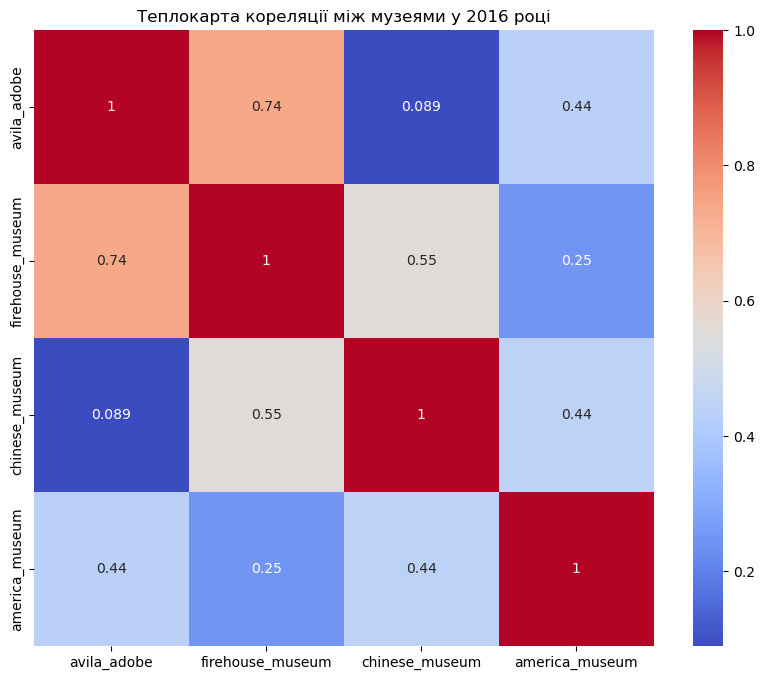

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Теплокарта кореляції між музеями у 2016 році')
plt.show()

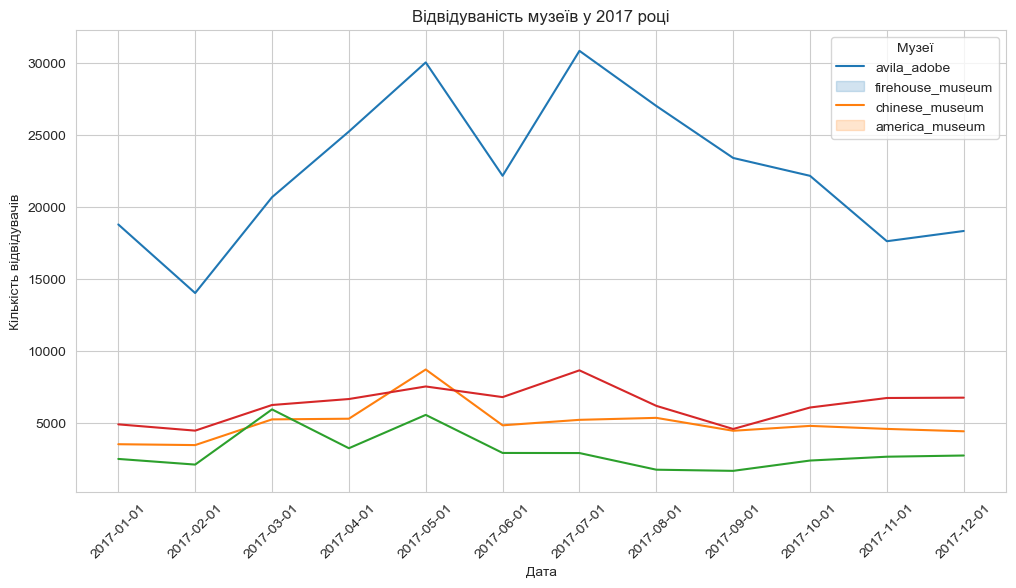

In [56]:
d_2017 = data[data['date'].str.startswith('2017')]

# Вибір стовпців з кількістю відвідувачів для кожного музею
col_1 = ['avila_adobe', 'firehouse_museum', 'chinese_museum', 'america_museum']

# Групування даних за датою і обчислення загальної кількості відвідувачів для кожного музею
grouped_data = d_2017.groupby('date')[col_1].sum().reset_index()

# Побудова графіка ліній за допомогою Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(grouped_data, ['date']))
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.legend(title='Музеї', labels=col_1)
plt.xticks(rotation=45)
sns.set_style("whitegrid")
plt.show()

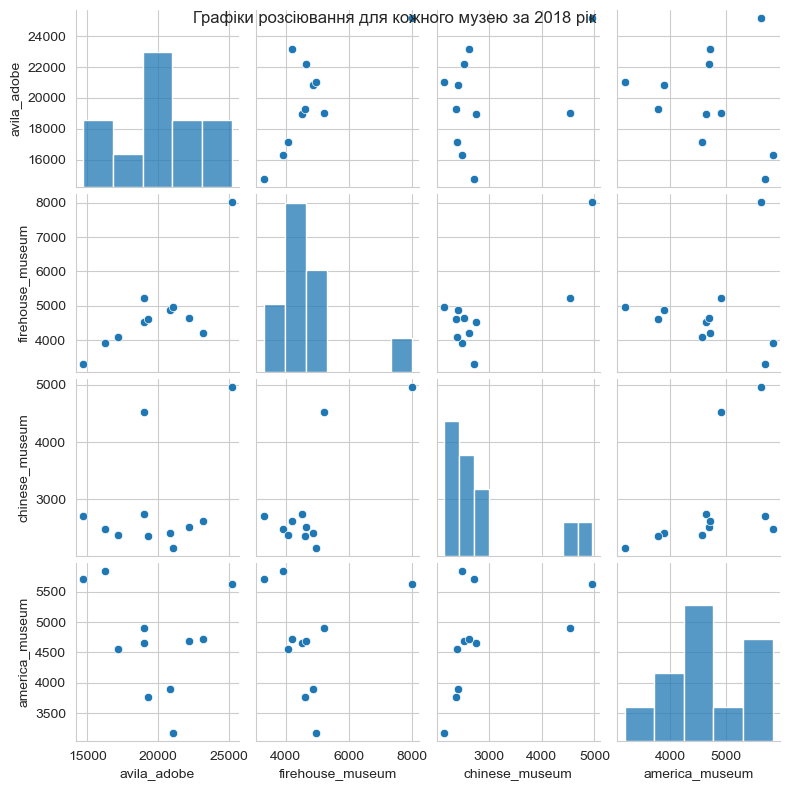

In [60]:
sns.set_style("whitegrid")
col_1 = ['avila_adobe', 'firehouse_museum', 'chinese_museum', 'america_museum']
sns.pairplot(data=d_2018, vars = col_1, height = 2)
plt.suptitle("Графіки розсіювання для кожного музею за 2018 рік")
plt.show()

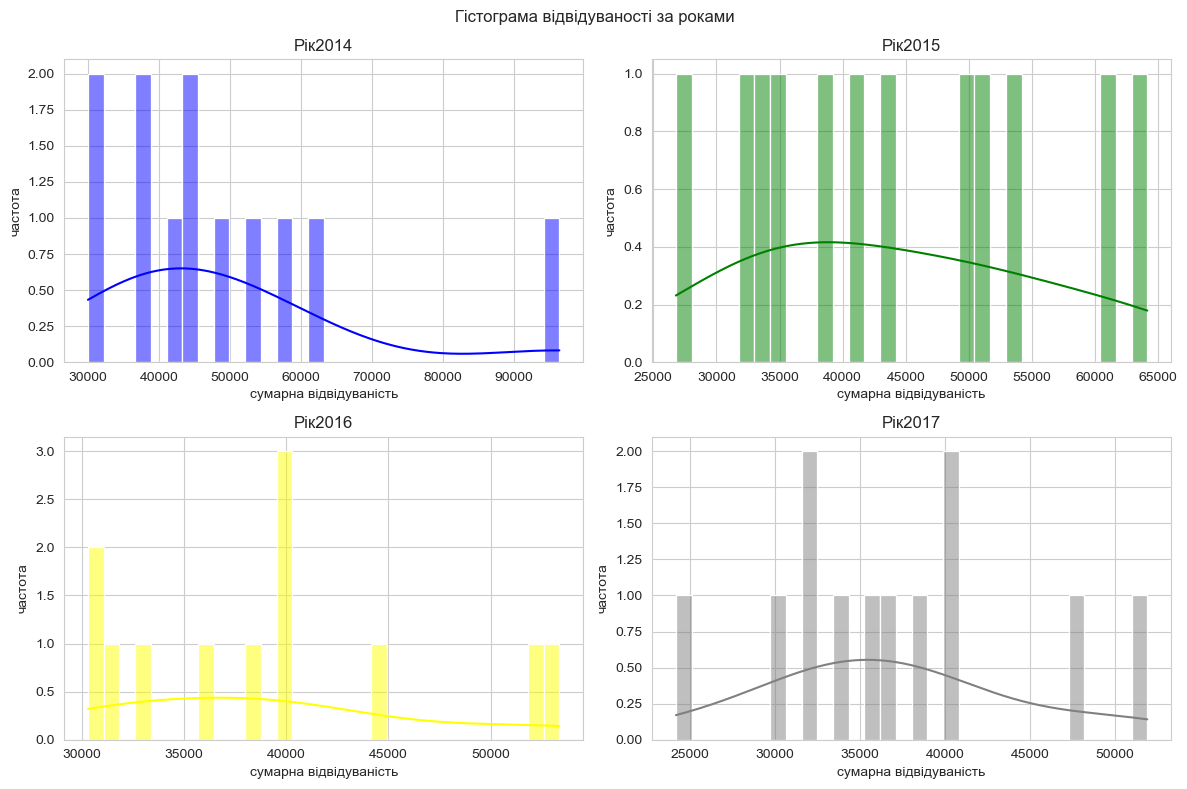

In [65]:
# Фільтрація даних за роками
d_2014 = data[data['date'].str.startswith('2014')]
d_2015 = data[data['date'].str.startswith('2015')]
d_2016 = data[data['date'].str.startswith('2016')]
d_2017 = data[data['date'].str.startswith('2017')]

# Вибір стовпців з кількістю відвідувачів для кожного музею
col_1 = ['avila_adobe', 'firehouse_museum', 'chinese_museum', 'america_museum']

fig, axes = plt.subplots(2,2, figsize = (12,8))
fig.suptitle('Гістограма відвідуваності за роками')
colors = ['blue', 'green', 'yellow', 'gray']
for i, data_year in enumerate([d_2014, d_2015, d_2016, d_2017]):
    summed_visitors = data_year[col_1].sum(axis=1)
    ax = axes[i//2, i%2]
    sns.histplot(data = summed_visitors, bins=30, kde=True,ax=ax, color=colors[i])
    ax.set_title(f"Рік{i+2014}")
    ax.set_xlabel("сумарна відвідуваність")
    ax.set_ylabel("частота")
plt.tight_layout()
plt.show()

Провели попередній аналіз даних.Перевірили наявність дублікатів.Обчислили середню кількість відвідувачів для кожного музею протягом всього періоду. відфільтрували датасет по роках. За допомогою бібліотеки seaborn візуалізували теплокарту кореляції, графіки ліній, графіки розсіювання, гістограми.